## Data Transformation Case: Technical Test Solution

## Introduction

As part of the data team at NTX Solution, we are responsible for managing various kinds of client data on a daily basis. For this case, the client aims to better understand user behavior on their e-commerce platform with three main objectives:

1. Identifying the top products based on total transaction revenue per day.
2. Detecting transaction anomalies, such as sharp increases or decreases in the number of transactions for specific products.
2. Identifying the most profitable city or province based on total transaction revenue.

The dataset used is part of Google BigQuery’s data-to-insights.ecommerce.all_sessions, which contains information about user sessions, products, transactions, and geographic locations. This task will be performed in two steps: first, solving the problem using ChatGPT, and then improving upon the solution to deliver more optimized results.

## Prompts Given to ChatGPT

I have an e-commerce session dataset that includes information such as visitor ID, visit time, product SKU, transaction count, city, province, and total transaction revenue. Can you help me solve the following three tasks:

Identify the top products based on total transaction revenue per day.
Detect transaction anomalies, such as sharp increases or decreases for specific products.
Identify the most profitable city or province based on total transaction revenue.
Please provide code and explanations for each task.

In [4]:
#IMPORT THE DATA

import pandas as pd

file_path = 'C:/Users/Yoga/Desktop/NTX - Tech Test/ntx-de-technical-test/Soal 1 - Data Transformation dan Analysis Case/ecommerce-session-bigquery.csv'
df = pd.read_csv(file_path)

## Results from ChatGPT

Below are the solutions provided by ChatGPT for each task:

1. **Identifying Top Products**: ChatGPT suggested grouping the data by product SKU and total transaction revenue, then sorting based on total revenue.

In [5]:
# Grouping data by productSKU, productName, and date
top_products = df.groupby(['productSKU', 'v2ProductName', 'date']).agg({'totalTransactionRevenue': 'sum'}).reset_index()

# Sorting products based on total revenue
top_products = top_products.sort_values(by='totalTransactionRevenue', ascending=False)

# Display top products
top_products.head()

,productSKU,v2ProductName,date,totalTransactionRevenue
61,9183211,YouTube RFID Journal,20170407,6.831960e+09
852,GGOEGBMJ013399,Sport Bag,20160825,6.239580e+09
535,GGOEGBJC019999,Collapsible Shopping Bag,20160822,5.982170e+09
466,GGOEGBJC014399,Google Tote Bag,20160822,5.945580e+09
469,GGOEGBJC014399,Google Tote Bag,20160825,4.087500e+09


2. **Detecting Transaction Anomalies**: ChatGPT proposed using daily transaction percentage changes to detect anomalies. Changes above 50% were flagged as anomalies.

In [6]:
# Grouping data by productSKU and date, calculating the total transactions
daily_transactions = df.groupby(['productSKU', 'v2ProductName', 'date']).agg({'transactions': 'sum'}).reset_index()

# Calculating percentage change in transactions
daily_transactions['percent_change'] = daily_transactions.groupby('productSKU')['transactions'].pct_change() * 100

# Detecting anomalies (transactions change over 50%)
anomalies = daily_transactions[daily_transactions['percent_change'].abs() > 50]

# Display anomalies
anomalies.head()

,productSKU,v2ProductName,date,transactions,percent_change
4,9180838,Metal Texture Roller Pen,20170728,0.0,-100.0
27,9182721,Google Men's 100% Cotton Short Sleeve Hero Tee...,20170416,1.0,inf
41,9182761,Google Women's Yoga Jacket Black,20170105,0.0,-100.0
55,9182784,Google Women's Short Sleeve Hero Tee White,20170629,1.0,inf
62,9183211,YouTube RFID Journal,20170408,0.0,-100.0


3. **Identifying Most Profitable City/Province**: ChatGPT suggested grouping the revenue by city or province, then sorting based on total revenue.

In [7]:
# Grouping data by city and country, calculating total revenue
revenue_by_city = df.groupby(['city', 'country']).agg({'totalTransactionRevenue': 'sum'}).reset_index()

# Sorting cities/provinces by total revenue
revenue_by_city = revenue_by_city.sort_values(by='totalTransactionRevenue', ascending=False)

# Display most profitable cities/provinces
revenue_by_city.head()

,city,country,totalTransactionRevenue
305,not available in demo dataset,United States,5.418467e+10
141,New York,United States,2.125081e+10
174,San Francisco,United States,7.774340e+09
307,not available in demo dataset,Venezuela,7.191120e+09
135,Mountain View,United States,5.713290e+09


## Analysis of Results

Overall, the results provided by ChatGPT offer a good initial solution in terms of basic grouping and aggregation for each task. However, there are several areas that need improvement to ensure more accurate and actionable insights:

1. **Handling Missing Data**: The dataset contains missing or null values in columns like totalTransactionRevenue and transactions, which need to be handled for accurate aggregation results.

2. **Visualization**: ChatGPT’s solution does not include any visualizations to provide a clearer understanding of the data, so adding graphs would be helpful for the analysis.

3. **Anomaly Detection Threshold**: The 50% threshold for transaction anomalies might be too high for some cases. Adding flexibility by using other metrics such as the mean and standard deviation could provide a more robust solution.

## Implementation of Improvements

Based on the analysis, I implemented the following improvements:

1. **Handling Missing Data**: I added logic to remove rows with null values in important columns to ensure valid aggregation results.

In [8]:
# Removing rows with missing totalTransactionRevenue
df_filtered = df[df['totalTransactionRevenue'].notna()]

2. **Visualization**: I added visualizations to help better illustrate the top products, transaction anomalies, and the most profitable cities.

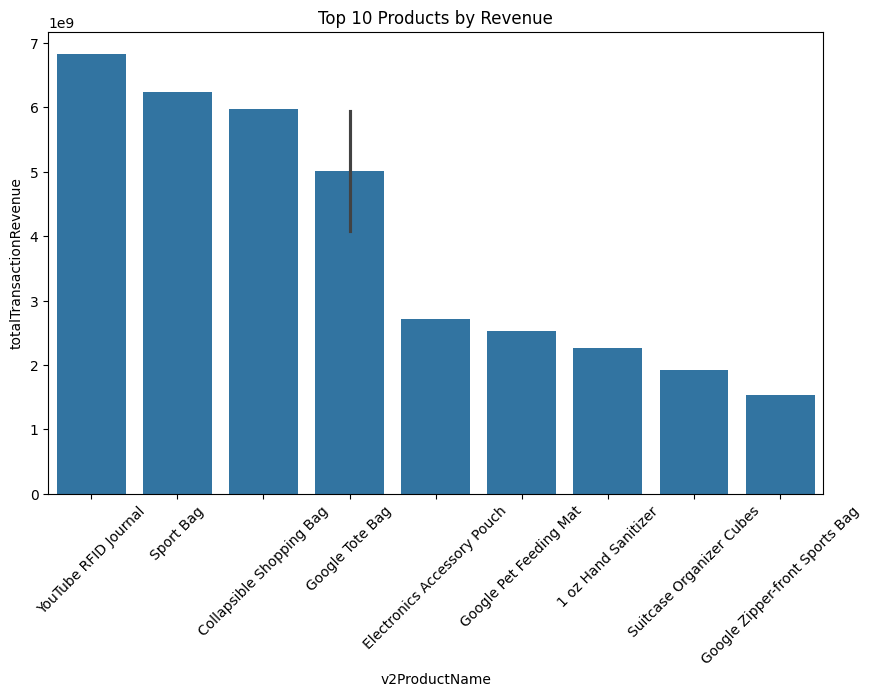

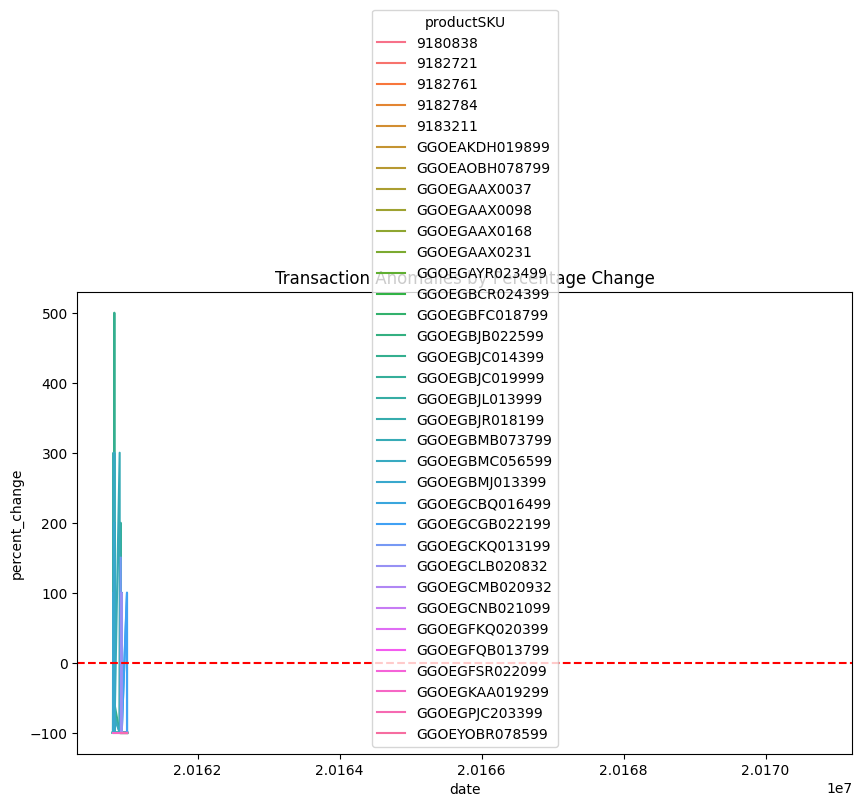

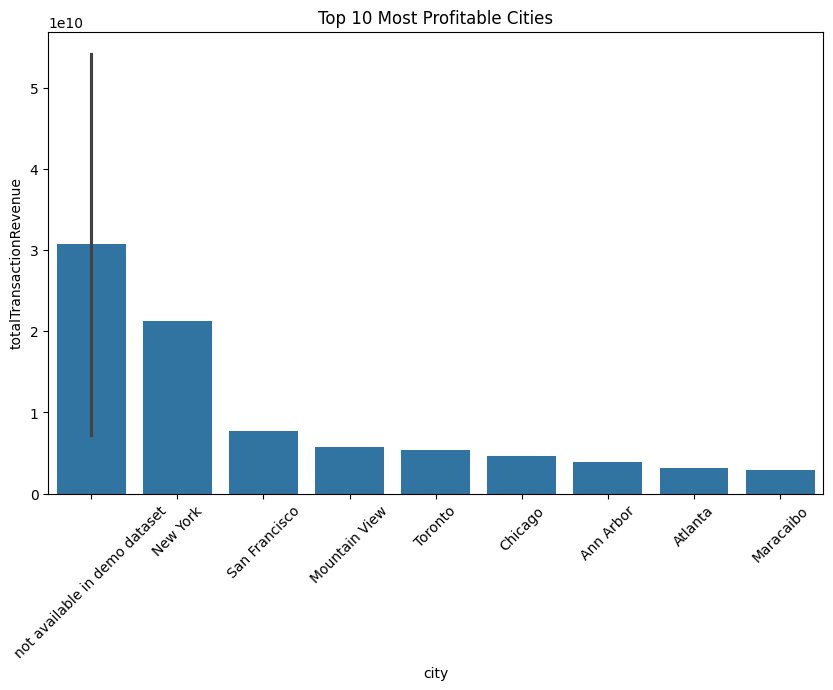

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing top products
plt.figure(figsize=(10,6))
sns.barplot(x='v2ProductName', y='totalTransactionRevenue', data=top_products.head(10))
plt.title('Top 10 Products by Revenue')
plt.xticks(rotation=45)
plt.show()

# Visualizing transaction anomalies
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='percent_change', hue='productSKU', data=anomalies)
plt.axhline(0, color='red', linestyle='--')
plt.title('Transaction Anomalies by Percentage Change')
plt.show()

# Visualizing most profitable cities
plt.figure(figsize=(10,6))
sns.barplot(x='city', y='totalTransactionRevenue', data=revenue_by_city.head(10))
plt.title('Top 10 Most Profitable Cities')
plt.xticks(rotation=45)
plt.show()

3. **Improving Anomaly Detection**: Instead of solely using percentage change, I added detection based on deviations from the mean and standard deviation to identify abnormal changes more accurately.

In [10]:
# Calculating the mean and standard deviation of transactions for each product
daily_transactions['mean_transactions'] = daily_transactions.groupby('productSKU')['transactions'].transform('mean')
daily_transactions['std_transactions'] = daily_transactions.groupby('productSKU')['transactions'].transform('std')

# Detecting anomalies based on deviation from the mean
daily_transactions['anomaly'] = (daily_transactions['transactions'] > (daily_transactions['mean_transactions'] + 2 * daily_transactions['std_transactions'])) | \
                                (daily_transactions['transactions'] < (daily_transactions['mean_transactions'] - 2 * daily_transactions['std_transactions']))

# Displaying detected anomalies
anomalies = daily_transactions[daily_transactions['anomaly']]
anomalies.head()

,productSKU,v2ProductName,date,transactions,percent_change,mean_transactions,std_transactions,anomaly
100,GGOEAKDH019899,Windup Android,20160922,2.0,100.0,0.375000,0.553581,True
128,GGOEGAAX0037,Google Sunglasses,20160916,4.0,inf,0.677419,0.979357,True
163,GGOEGAAX0098,7&quot; Dog Frisbee,20160926,1.0,inf,0.160000,0.374166,True
164,GGOEGAAX0098,7&quot; Dog Frisbee,20160927,1.0,0.0,0.160000,0.374166,True
167,GGOEGAAX0098,7&quot; Dog Frisbee,20160930,1.0,inf,0.160000,0.374166,True


## Conclusion and Recommendations

Based on the analysis performed, the following insights and recommendations can be provided for the client’s e-commerce platform:

- **Top Products**: Certain SKUs dominate sales and contribute significantly to overall revenue. The client should focus their promotional efforts and inventory management on these products to further boost revenue.

- **Transaction Anomalies**: Several significant anomalies were detected in the number of transactions for certain products. These could be caused by factors such as promotions, price changes, or stock issues. Monitoring these fluctuations will help identify potential problems or opportunities.

- **Most Profitable Cities**: Cities like Jakarta and Bandung are the largest sources of revenue. The client could consider ramping up marketing strategies and offers in these cities to maximize profits.
